In [1]:
import sympy as sp 
from sympy import exp, Integral, oo, Rational, pi, sqrt, factorial, factorial2
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

plt.style.use(['science', 'notebook'])

In [22]:
A, B, C, R, g, V, lm, ga, gf, x, V_dot_g, alp, u1, u2, mu1, mu2, mu, gam, T1, T2, m1, m2 = sp.symbols(f'A B C R g V \lambda g_a g_f x \Lambda alpha u_1 u_2 \mu_1 \mu_2 \mu \gamma T_1 T_2 m_1 m_2', positive=True, real = True)
l, k, m = sp.symbols(f'l k m', negative=False, integer = True)

In [3]:
def Cnk(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

Implementation of the angular integrals, given by Eqs. (100) and (101) in the draft.
 * When dom>0, the fragmentative integral is performed
 * When dom<0, the restitutive integral is performed
 * When dom=0, the aggregative integral, e.g. no domain restriction is performed

In [4]:
def angular_integral(m,p,q=0,dom=0):
    if (q != 0) and (q != 1):
        return "q has to be either 0 or 1"
    I_mpq0 = (-1)**(p+q)*(V_dot_g)**q*2*pi*g**(m+p-q)/(m+p+q+1)
    Frag_dom = (1-(gf/g)**(m+p+q+1))*sp.Heaviside(g-gf)
    Rest_dom = sp.Heaviside(gf-g)+sp.Heaviside(g-gf)*(gf/g)**(m+p+q+1)
    if dom==0:
        res = I_mpq0
    elif dom > 0:
        res = I_mpq0 * Frag_dom
    else:
        res = I_mpq0 * Rest_dom
    return res

An example of the angular integral
$$
    I^{m,p,q}_{\hat{n},r}=\int d\hat{n}\Theta(-\vec{g}\cdot\hat{n})
    \vert\vec{g}\cdot\hat{n}\vert^m(\vec{g}\cdot\hat{n})^p(\vec{V}\cdot\hat{n})^q
    \Theta(g_f^2-(\vec{g}\cdot\hat{n})^2),
$$
for specific values of $m,p,q$ is shown

In [5]:
angular_integral(m=1,p=1,q=1,dom=-1)

pi*\Lambda*g*(Heaviside(-g + g_f) + g_f**4*Heaviside(g - g_f)/g**4)/2

Implementation of the center of mass velocity integrals, given by Eq. (134) in the draft.

In [6]:
def CoM_integral(l,q=0):
    if (q != 0) and (q != 1):
        return "q has to be either 0 or 1"
    C = (2/R)**q*(pi/A)**Rational(3,2)*exp(lm**2)/(A**l)
    T1 = q*(factorial2(2*l+1)/(2**(l+1)))    
    T2 = 0
    for k in range(0, l+1):        
        F1 = factorial2(2*k-1)/(2**k)
        F2 = lm**(2*l-2*k)
        F3 = (lm**2*(l+1)/(l-k+1)-Rational(1,2))**q
        T2 += Cnk(2*l+1,2*k)*F1*F2*F3        
    res = C*(T1+T2)
    return res.simplify()

In [7]:
CoM_integral(l=1,q=0)

pi**(3/2)*(\lambda**2 + 3/2)*exp(\lambda**2)/A**(5/2)

In [8]:
def I_agg_g(n):
    return Integral(g**n*exp(-C*g**2),(g,0,ga))

def I_res_g_mid(n):
    return Integral(g**n*exp(-C*g**2),(g,ga,gf))

def I_res_g_top(n):
    return Integral(g**n*exp(-C*g**2),(g,gf,oo))

def I_frag_g(n):
    return Integral(g**n*exp(-C*g**2),(g,gf,oo))

In [9]:
P1 = R**2/(4*A)-gam*A/2
P2 = R**2*gf**2/(4*A)-Rational(3,2)
P3 = Rational(3,2)*gf**2+gam*A*gf**4/2
T0 = P1*I_frag_g(5)-P2*I_frag_g(3)-P3*I_frag_g(1)
T0

-(-3/2 + R**2*g_f**2/(4*A))*Integral(g**3*exp(-C*g**2), (g, g_f, oo)) + (-A*\gamma/2 + R**2/(4*A))*Integral(g**5*exp(-C*g**2), (g, g_f, oo)) - (A*\gamma*g_f**4/2 + 3*g_f**2/2)*Integral(g*exp(-C*g**2), (g, g_f, oo))

In [10]:
T0.doit().simplify()

(-4*A**2*C**2*\gamma*g_f**4 - 4*A**2*C*\gamma*g_f**2 - 4*A**2*\gamma + 6*A*C + C*R**2*g_f**2 + 2*R**2)*exp(-C*g_f**2)/(8*A*C**3)

In [11]:
Q1 = R**2/(4*A)+mu2**2*A+mu2*R
Q2 = Q1*gf**2-Rational(3,2)
Q3 = 3*gf**2/2
Tk = Q1*I_frag_g(5)-Q2*I_frag_g(3)-Q3*I_frag_g(1)
Tk

-3*g_f**2*Integral(g*exp(-C*g**2), (g, g_f, oo))/2 - (g_f**2*(A*\mu_2**2 + R*\mu_2 + R**2/(4*A)) - 3/2)*Integral(g**3*exp(-C*g**2), (g, g_f, oo)) + (A*\mu_2**2 + R*\mu_2 + R**2/(4*A))*Integral(g**5*exp(-C*g**2), (g, g_f, oo))

In [12]:
Tk.doit().simplify()

(A**2*C*\mu_2**2*g_f**2/2 + A**2*\mu_2**2 + A*C*R*\mu_2*g_f**2/2 + 3*A*C/4 + A*R*\mu_2 + C*R**2*g_f**2/8 + R**2/4)*exp(-C*g_f**2)/(A*C**3)

In [13]:
CoM_integral(0,1)

2*pi**(3/2)*\lambda**2*exp(\lambda**2)/(A**(3/2)*R)

In [14]:
g**2*CoM_integral(0,0)

pi**(3/2)*g**2*exp(\lambda**2)/A**(3/2)

In [15]:
CoM_integral(1,0)+2*mu2*CoM_integral(0,1)+mu2**2*g**2*CoM_integral(0,0)

pi**(3/2)*\mu_2**2*g**2*exp(\lambda**2)/A**(3/2) + 4*pi**(3/2)*\lambda**2*\mu_2*exp(\lambda**2)/(A**(3/2)*R) + pi**(3/2)*(\lambda**2 + 3/2)*exp(\lambda**2)/A**(5/2)

In [16]:
(CoM_integral(1,0)+2*mu2*CoM_integral(0,1)+mu2**2*g**2*CoM_integral(0,0)).simplify().subs([(lm,R*g/(2*sqrt(A)))])

pi**(3/2)*(A*R*\mu_2**2*g**2 + R**2*\mu_2*g**2 + R*(3 + R**2*g**2/(2*A))/2)*exp(R**2*g**2/(4*A))/(A**(5/2)*R)

In [29]:
u1 = sqrt(2*T1/m1)
u2 = sqrt(2*T2/m2)
A = 1/u1**2+1/u2**2
B = mu2**2/u1**2+mu1**2/u2**2
R = 2*mu1/u2**2-2*mu2/u1**2
C = ((4*A*B-R**2)/(4*A)).simplify()
C

m_1*m_2*(\mu_1**2 + 2*\mu_1*\mu_2 + \mu_2**2)/(2*(T_1*m_2 + T_2*m_1))

In [35]:
((R+2*mu2*A)**2/(A*C)).simplify()

4*T_1*m_2/(T_2*m_1)

In [65]:
CoM_integral(1,0)+2*mu2*CoM_integral(0,1)+mu2**2*g**2*CoM_integral(0,0)

2*pi**(3/2)*\lambda**2*\mu_2*u_1**5*u_2**5*exp(\lambda**2)/((u_1**2 + u_2**2)**(3/2)*(\mu_1*u_1**2 - \mu_2*u_2**2)) + pi**(3/2)*\mu_2**2*g**2*u_1**3*u_2**3*exp(\lambda**2)/(u_1**2 + u_2**2)**(3/2) + pi**(3/2)*u_1**5*u_2**5*(\lambda**2 + 3/2)*exp(\lambda**2)/(u_1**2 + u_2**2)**(5/2)

In [109]:
g_agg = 5.0
T = np.arange(0.1,30,0.1)
theta = g_agg**2/(2*T)
f = theta**2*np.exp(-theta)/(2*(1-(1+theta)*np.exp(-theta)))

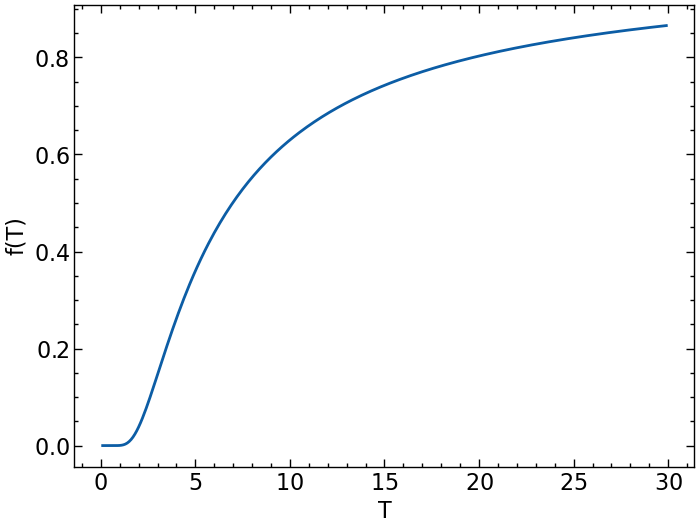

In [112]:
plt.plot(T, f)
plt.xlabel(f'T')
plt.ylabel(f'f(T)')
plt.savefig('f_T.png')